## Manually Set Confounding Variables

In [ ]:
# confounders = ['baseline', 'Apr Temp AVG / F', 'Total households!!Average household size', 'Jun Temp AVG / F', 'HospCt',\
#                'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)', \
#                'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)', \
#               'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten', 'Med_HH_Income_Percent_of_State_Total_2018',\
#                'Density per square mile of land area - Population', 'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool']
confounders = ['baseline']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from collections import defaultdict

In [3]:
combined_data = pd.read_csv('../data/intermediates/pre_acpca1.csv')
# pop = pd.read_csv('../data/raw/counties_05-08.csv').filter(['FIPS', 'POP_ESTIMATE_2018'])
# print(pop.head())
# combined_data = combined_data.merge(pop, left_on='FIPS', right_on='FIPS')
# combined_data.dropna()
# combined_data['normalized_deaths'] = np.true_divide(combined_data['Deaths'],combined_data['POP_ESTIMATE_2018'])
combined_data.set_index('FIPS', inplace=True)
print(combined_data.shape)
combined_data.head()

(211, 21)


,baseline,Density per square mile of land area - Population,Rural-urban_Continuum Code_2013,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Mar Temp AVG / F,Apr Temp AVG / F,May Temp AVG / F,...,Total_age65plus,Total households!!Average household size,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school,HospCt,Deaths,normalized_deaths
FIPS,,,,,,,,,,,,,,,,,,,,,
1055.0,0.411541,0.116127,0.25,0.361022,0.123984,0.135802,0.321642,0.697723,0.721448,0.778049,...,0.203494,0.325792,0.294336,0.358494,0.567540,0.362510,0.075155,0.258374,0.020576,0.119644
1081.0,0.260364,0.138024,0.25,0.169329,0.457317,0.104938,0.390932,0.757764,0.743733,0.802439,...,0.056305,0.343891,0.586319,0.144048,0.571650,0.451833,0.609583,0.046170,0.082305,0.193068
1095.0,0.483091,0.097183,0.50,0.476038,0.154472,0.092593,0.344739,0.672878,0.696379,0.768293,...,0.162744,0.334842,0.241579,0.364819,0.680389,0.659251,0.086210,0.278906,0.012346,0.100503
1097.0,0.419447,0.202669,0.00,0.306709,0.229675,0.172840,0.299401,0.846791,0.813370,0.865854,...,0.145504,0.303167,0.505194,0.328976,0.607318,0.520245,0.119985,0.102618,0.144033,0.118461
1101.0,0.281413,0.175975,0.00,0.325879,0.416667,0.129630,0.402908,0.792961,0.782730,0.848780,...,0.123487,0.271493,0.275549,0.385057,0.597948,0.570767,0.176654,0.159904,0.012346,0.036609


In [4]:
ind_vars = list(combined_data.drop(columns=confounders).columns)
ind_vars

['Density per square mile of land area - Population',
 'Rural-urban_Continuum Code_2013',
 'Percent of adults with less than a high school diploma 2014-18',
 "Percent of adults with a bachelor's degree or higher 2014-18",
 'Unemployment_rate_2018',
 'Med_HH_Income_Percent_of_State_Total_2018',
 'Mar Temp AVG / F',
 'Apr Temp AVG / F',
 'May Temp AVG / F',
 'Jun Temp AVG / F',
 'Total_age65plus',
 'Total households!!Average household size',
 'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool',
 'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten',
 'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)',
 'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12)',
 'SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school',
 'HospCt',
 'Deaths',
 'normalized_deaths']

          PC1        PC2        PC3        PC4       PC5       PC6       PC7  \
0 -339.209686  30.923555  17.760476  12.507342  7.687934  4.448063  3.824673   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  3.458216  2.323821  2.092037  1.638841  1.524806  1.145982  1.030967   

       PC15     PC16      PC17      PC18  
0  0.114114  0.29321  0.494998  0.462995  
[30.92355454 17.76047584 12.5073423   7.68793376  4.4480626   3.82467258
  3.45821641  2.32382073  2.09203681]
18


<BarContainer object of 18 artists>

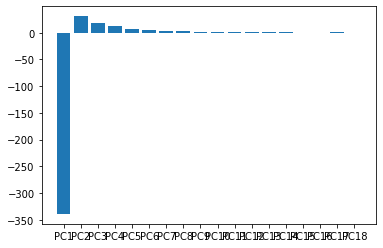

In [5]:
eigens = pd.read_csv('../data/intermediates/eigenvalues_ind.csv')
print(eigens.head())
eigs = eigens.to_numpy()
positive_eigs = eigs[eigs > 2]
print(positive_eigs)
# total_pcs = len(positive_eigs)
_, total_pcs = eigs.shape
print(total_pcs )
# print(eigens.loc[0,eigens.columns.values[0:]])
# labels = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(eigens.columns.values[0:], eigens.loc[0,eigens.columns.values[0:]]) 

In [6]:
# eigen_d = pd.read_csv('../data/intermediates/eigenvalues_d.csv')
# print(eigen_d.head())

In [7]:
# sigs = pd.read_csv('../data/intermediates/sigs_ind.csv')
# print(sigs.head())
# plt.bar(sigs.columns.values, sigs.loc[0,])

In [8]:
PCs = pd.read_csv('../data/intermediates/PCs_ind.csv')
# if 'Unnamed: 0' in PCs.columns.values: 
#     PCs.drop(columns='Unnamed: 0')
PCs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.159962,-0.111936,0.134077,0.355887,-0.331419,0.670912,-0.143265,0.375211,0.130536,-0.104442,0.048564,0.183381,-0.024402,-0.172330,-0.009025,0.026694,-0.030799,-0.002948
1,0.089404,0.039671,-0.322850,-0.531763,0.457323,0.238080,-0.357487,0.380048,0.011604,0.104177,0.185563,0.100859,-0.060444,-0.002337,-0.017855,-0.019888,-0.039865,0.061747
2,-0.041651,0.176496,-0.445428,0.180014,-0.196429,-0.139936,0.111419,0.092616,0.428707,0.284541,0.002133,0.206617,-0.384570,0.154833,0.029577,-0.102746,0.368161,0.175655
3,0.329530,-0.271579,0.304903,0.212464,0.243958,-0.128734,-0.155543,0.288078,0.022569,0.323748,-0.390708,-0.198109,-0.011396,0.421823,-0.016474,-0.072882,0.067130,0.104408
4,0.140621,0.020100,-0.254978,-0.007707,-0.163910,-0.035750,-0.083102,0.010223,-0.010620,0.187527,-0.140945,-0.223018,0.630369,-0.359661,0.027905,0.048181,0.227828,0.439300


### Lambda=20

In [9]:
# acpca_data_ = pd.read_csv('../data/intermediates/post_acpca_d.csv')
# print(acpca_data_deaths.head())
# acpca_arr_deaths = acpca_data_deaths.to_numpy()
# acpca_arr_deaths

acpca_data_ind = pd.read_csv('../data/intermediates/post_acpca_ind.csv')
acpca_data_ind.head()
acpca_arr_ind = acpca_data_ind.to_numpy()
# acpca_arr_ind

In [10]:
acpca_data = pd.read_csv('../data/intermediates/post_acpca_ind.csv')
acpca_arr_ind = acpca_data.to_numpy()
acpca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-0.344782,-0.411385,-0.330095,-0.210771,-0.091091,0.021912,0.114324,-0.003376,0.036926,-0.019196,0.004712,0.093879,0.001751,0.036212,0.012772,-0.032177,-0.035903,-0.004168
1,0.072745,-0.727607,-0.187991,0.088592,0.199029,-0.204161,-0.163453,-0.060373,-0.021687,-0.070992,0.157642,0.066372,-0.066797,-0.076628,-0.024835,0.028554,-0.046145,-0.004432
2,-0.409617,-0.291495,-0.507544,-0.204880,0.072448,0.010730,-0.023235,0.214548,0.036939,-0.073444,0.012302,-0.015431,-0.151201,0.054053,0.004583,0.018669,0.004643,0.016965
3,-0.370313,-0.656632,-0.309692,0.121011,-0.162317,-0.003072,0.004115,-0.131009,-0.121696,-0.001256,0.015284,0.009097,-0.021708,0.002437,-0.032741,-0.016255,0.029211,-0.007044
4,-0.344726,-0.643939,-0.191267,0.121921,-0.065601,-0.088160,0.131033,0.081170,-0.054247,-0.040385,-0.061953,-0.075373,-0.056077,0.067255,-0.021235,-0.010428,0.064982,0.035943


In [11]:
# plt.plot(list(acpca_data_ind['PC1'].values), list(acpca_data_deaths['PC1'].values), 'bo')
# plt.xlabel('multi-variable PC')
# plt.ylabel('deaths PC')

In [12]:
# num_pcs = 14
# X = acpca_arr_ind[:,0:num_pcs]
# print(X.shape)
# Y = acpca_arr_deaths[:,0]
# print(Y.shape)
# reg = lm.LinearRegression().fit(X,Y)
# reg.score(X,Y)

In [13]:
# num_pcs = 1
# X = acpca_arr_ind[:,0:num_pcs]
# print(X.shape)
# Y = acpca_arr_deaths[:,0]
# print(Y.shape)
# reg = lm.LinearRegression().fit(X,Y)
# reg.score(X,Y)

## Regression on individual components

PC:  1
deaths corr score 0.013805782630532892
mobility corr score 0.2471364095026397
PC:  2
deaths corr score 0.0027616939064463164
mobility corr score 4.366807840305853e-05
PC:  3
deaths corr score 0.06392428156621854
mobility corr score 7.7627905162303e-05
PC:  4
deaths corr score 0.027174986311468526
mobility corr score 9.267536769108631e-07
PC:  5
deaths corr score 0.011265527237057427
mobility corr score 9.276105138122936e-06
PC:  6
deaths corr score 0.04400101797000078
mobility corr score 6.648641696083146e-07
PC:  7
deaths corr score 0.028894053123518226
mobility corr score 1.1912407399394809e-06
PC:  8
deaths corr score 0.00031577284078021517
mobility corr score 8.270746163496767e-07
PC:  9
deaths corr score 0.0007388781445415438
mobility corr score 5.029222367891606e-06
PC:  10
deaths corr score 0.00591209161111339
mobility corr score 8.275268614355014e-06
PC:  11
deaths corr score 0.0006514470474765499
mobility corr score 6.654381752291272e-06
PC:  12
deaths corr score 0.0164

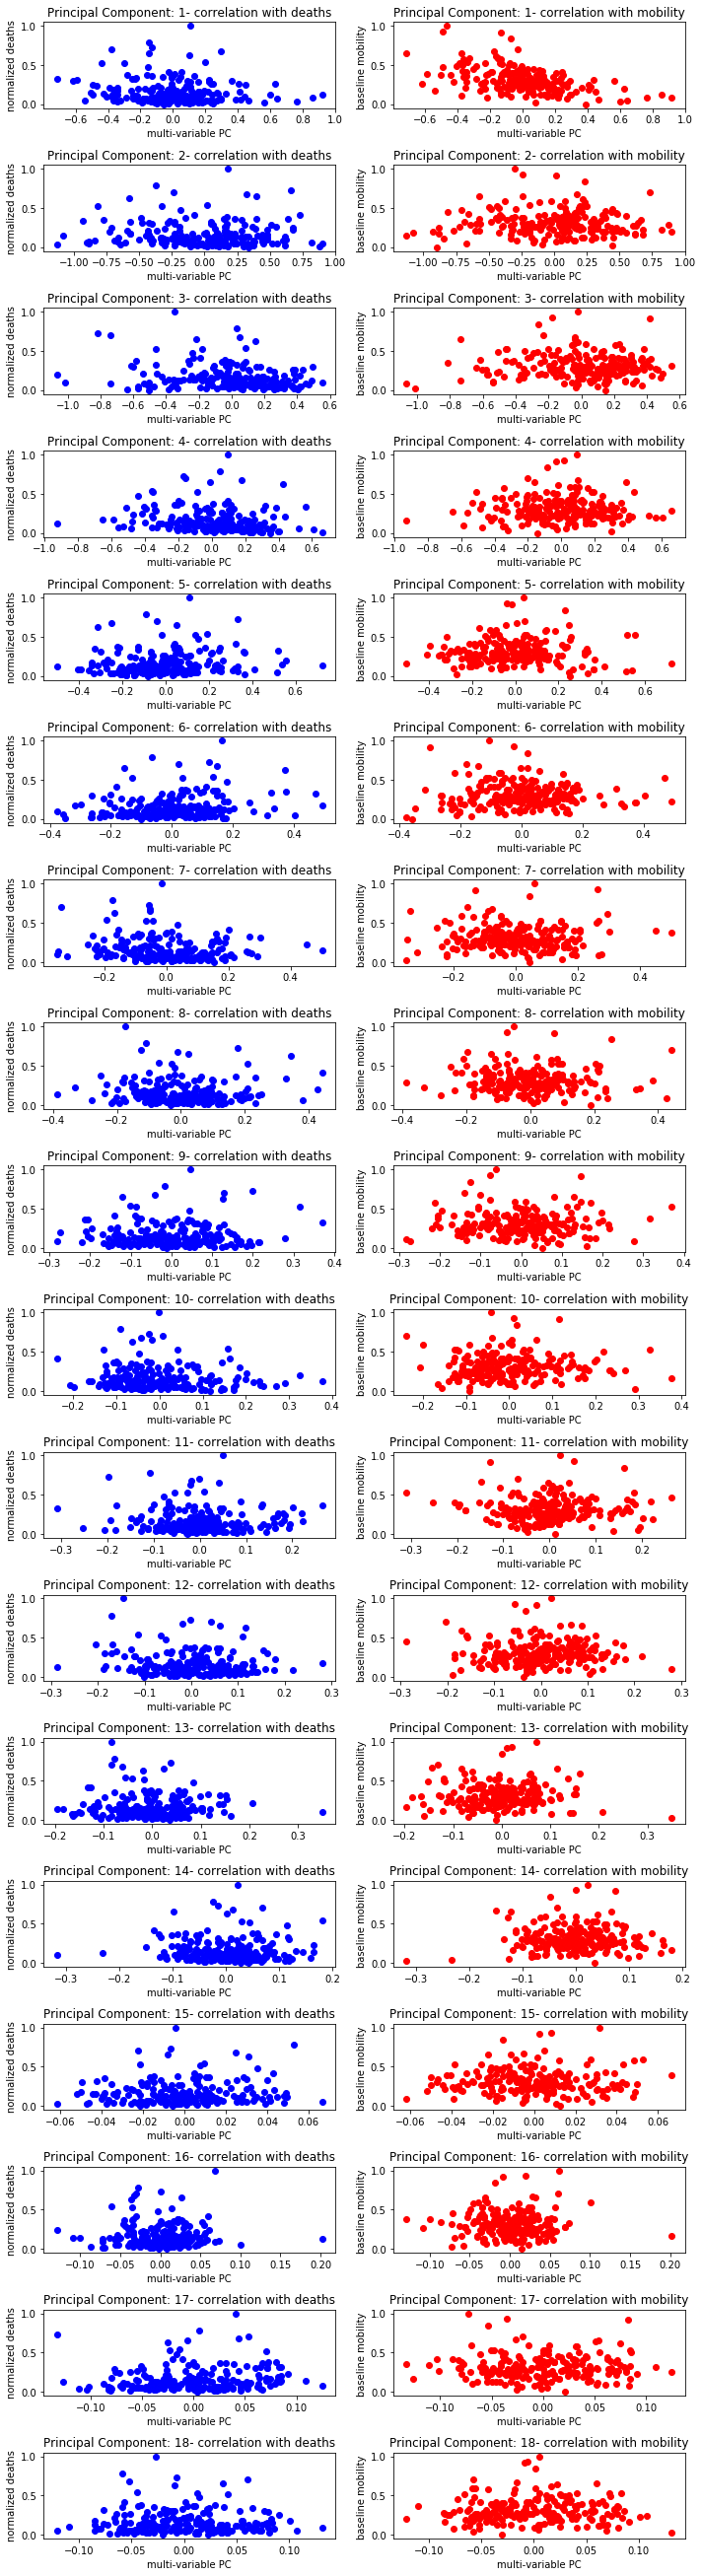

In [14]:
scores = {}
plt.figure(figsize=(10,40))
target_pcs = 0

for pc in range(total_pcs): 
    print('PC: ', pc+1)
    X = acpca_arr_ind[:,pc]
    (r,) = X.shape
#     print(X.shape)
    X = X.reshape(r,1)
#     print(X.shape)
    Y = combined_data['normalized_deaths']
#     print(Y.shape)
    reg = lm.LinearRegression().fit(X,Y)
    score = reg.score(X,Y)
    
    print("deaths corr score", score)
    plt.subplot(20,2,2*pc+1)
    plt.tight_layout()
    plt.plot(X, Y, 'bo')
    plt.xlabel('multi-variable PC')
    plt.ylabel('normalized deaths')
    plt.title('Principal Component: ' + str(pc+1) + '- correlation with deaths')
    
    m = combined_data['baseline']
   
    reg_mob = lm.LinearRegression().fit(X,m)
    m_score = reg_mob.score(X,m)
    print('mobility corr score', m_score)
    plt.subplot(20,2,2*pc+2)
    plt.plot(X, m, 'ro')
    plt.xlabel('multi-variable PC')
    plt.ylabel('baseline mobility ')
    plt.title('Principal Component: ' + str(pc+1) + '- correlation with mobility')
    eig = eigens.loc[0, 'PC' + str(pc+1)]
    if m_score < score and eig > 0: 
        target_pcs += 1
        scores[pc] = score
# pc = 17    
# X = acpca_arr_ind[:,pc]
# (r,) = X.shape
# #     print(X.shape)
# X = X.reshape(r,1)
# print(X.shape)
# Y = combined_data['normalized_deaths']
# print(Y.shape)
# reg = lm.LinearRegression().fit(X,Y)
# score = reg.score(X,Y)
# scores[pc] = score
# print("deaths corr score", score)
# plt.subplot(20,2,2*pc+1)
# plt.tight_layout()
# plt.plot(X, Y, 'bo')
# plt.xlabel('multi-variable PC')
# plt.ylabel('normalized deaths')
# plt.title('Principal Component: ' + str(pc+1) + 'correlation with deaths')

# m = combined_data['baseline']
# reg_mob = lm.LinearRegression().fit(X,m)
# print('mobility corr score', reg_mob.score(X,m))
# plt.subplot(20,2,2*pc+2)
# plt.plot(X, m, 'ro')
# plt.xlabel('multi-variable PC')
# plt.ylabel('baseline mobility ')
# plt.title('Principal Component: ' + str(pc+1) + 'correlation with mobility')

## Sort PCs by regression scores

In [15]:
scores = {k: v for k, v in sorted(scores.items(), key=lambda item: -item[1])}
for pc, score in scores.items():
    print(pc+1, score)

3 0.06392428156621854
6 0.04400101797000078
7 0.028894053123518226
4 0.027174986311468526
17 0.020413220250692254
12 0.016462613642422963
5 0.011265527237057427
10 0.00591209161111339
15 0.005008564285322703
2 0.0027616939064463164
13 0.0017551158674713463
9 0.0007388781445415438
11 0.0006514470474765499
18 0.0006020001672861763
8 0.00031577284078021517
14 0.0001548668761388594
16 0.00014126734731145785


## Regression on multiple compnents

PCs: [3]
0.06392428156621854
[-0.13478468] 


PCs: [3 6]
0.10784355398295586
[-0.13469851  0.22417075] 


PCs: [3 6 7]
0.13664222828362438
[-0.13460512  0.22415355 -0.19575541] 


PCs: [3 6 7 4]
0.16390524692336084
[-0.13468526  0.22416831 -0.19577671 -0.10532591] 


PCs: [ 3  6  7  4 17]
0.18433878762143785
[-0.13470495  0.22417193 -0.19578195 -0.10532336  0.45837479] 


PCs: [ 3  6  7  4 17 12]
0.20083847337692484
[-0.13474147  0.22417866 -0.19579165 -0.10531862  0.45836804 -0.23467961] 


PCs: [ 3  6  7  4 17 12  5]
0.21226518955360496
[-0.13490558  0.22420888 -0.19583528 -0.10529734  0.45833767 -0.2346439
  0.08693479] 


PCs: [ 3  6  7  4 17 12  5 10]
0.218272213924852
[-0.13501786  0.22422956 -0.19586513 -0.10528278  0.4583169  -0.23461948
  0.08687601 -0.12083871] 


PCs: [ 3  6  7  4 17 12  5 10 15]
0.22324796694423069
[-0.13497446  0.22422157 -0.19585359 -0.10528841  0.45832493 -0.23462892
  0.08689873 -0.12087985  0.4710612 ] 


PCs: [ 3  6  7  4 17 12  5 10 15  2]
0.22587324

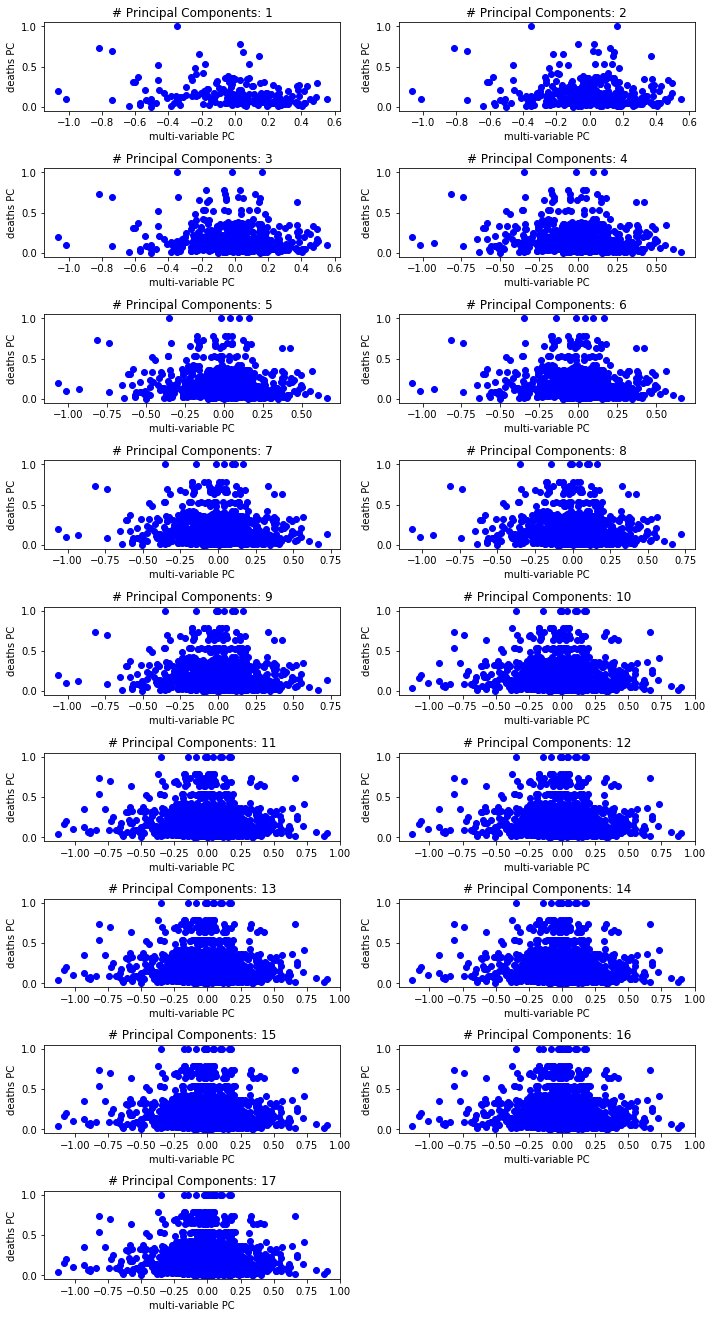

In [16]:
# Get list of PCs that are most correlated with # deaths
# Add PCs to LR model one by one in order of highest to lowest regression scores
Y = combined_data['normalized_deaths']
plt.figure(figsize=(10,20))
# num_pcs = 5

for num_pcs in range(1, target_pcs+1): 
    inds_pcs = list(scores.keys())[:num_pcs] # indices of top num_pcs most correlated PCs
    print('PCs:', np.array(inds_pcs)+1)
    X = acpca_arr_ind[:,inds_pcs]
#     print(X.shape)
#     Y = combined_data['Deaths']
#     print(Y.shape)
    reg = lm.LinearRegression().fit(X,Y)
    score = reg.score(X,Y)
    print(score)
    print(reg.coef_, '\n\n')
    plt.subplot(10,2,num_pcs)
    plt.tight_layout()
    plt.plot(X, Y, 'bo')
    plt.xlabel('multi-variable PC')
    plt.ylabel('deaths PC')
    plt.title('# Principal Components: ' + str(num_pcs))
    

## Assign coefficients of LR model to PCs

In [17]:
inds_pcs = list(scores.keys()) # indices of top num_pcs most correlated PCs
print('PCs:', np.array(inds_pcs)+1)
X = acpca_arr_ind[:,inds_pcs]
#     print(X.shape)
# Y = combined_data['Deaths']
Y = combined_data['normalized_deaths']
#     print(Y.shape)
reg = lm.LinearRegression().fit(X,Y)
final_score = reg.score(X,Y)
print(final_score)
print(reg.coef_, '\n\n')
coeffs = {}
for i in range(len(inds_pcs)): 
    coeffs[inds_pcs[i]] = reg.coef_[i]
    print(inds_pcs[i]+1, reg.coef_[i])

PCs: [ 3  6  7  4 17 12  5 10 15  2 13  9 11 18  8 14 16]
0.23028342599436424
[-0.13485834  0.22420018 -0.19582272 -0.10530347  0.45834642 -0.23465418
  0.08695952 -0.1209899   0.47086095 -0.02076967 -0.08976162  0.04098201
 -0.0439796  -0.08093107 -0.02131249 -0.02896713  0.04766874] 


3 -0.13485833708596898
6 0.2242001808559394
7 -0.19582272326471617
4 -0.10530346713996012
17 0.45834641522733566
12 -0.2346541821496972
5 0.08695952196248762
10 -0.12098990255259627
15 0.47086095491064967
2 -0.020769670100094978
13 -0.08976161638150801
9 0.0409820105978973
11 -0.04397959634227193
18 -0.0809310740942435
8 -0.02131249235585899
14 -0.02896713095772469
16 0.04766874140536444


## Print PCs in order of regression scores
#### print values in PCs in order of highest to lowest absolute value of loadings 
#### For each variable, calculate a sum of the product of the weights in each PC multiplied by the coefficient corresponding to the PC 

In [18]:
weights = {}
r,c = PCs.shape
for j in range(target_pcs): 
    pc = list(scores.keys())[j] + 1
    eig = eigens.loc[0, 'PC' + str(pc)]
    if eig < 0: 
        continue
    print('Principal Component', str(pc))
    print('eigenvalue: ', eig)
    PC_dict = {}
    # PC9 = [-0.190896056547888, 0.468236937317933,-0.228567222005448,0.408002822993487,0.0535105125245226,0.407238079363182,0.181820228133276,0.366604933989350,0.435246581102968]
    for i in range(r): 
    #     print('{0:<80} \t {1:>0.3f}'.format(combined_data.columns.values[i+2], PC9[i]))
        loading = PCs.loc[i,'PC' + str(pc)] # weight of variable in component
        variable = ind_vars[i] # variable name in column headers 
        PC_dict[variable] = loading
        coef = coeffs[pc-1] # coefficient corresponding to PC
        if variable not in weights:
            weights[variable] = 0
        weights[variable] += coef * loading
    PC_dict = {k: v for k, v in sorted(PC_dict.items(), key=lambda item: -abs(item[1]))}
    for k, v in PC_dict.items():
        print('{0:<100} \t {1:>0.3f}'.format(k, v))
    print('\n\n\n')
print(weights)

Principal Component 3
eigenvalue:  17.76047584274622
Med_HH_Income_Percent_of_State_Total_2018                                                            	 0.463
Percent of adults with less than a high school diploma 2014-18                                       	 -0.445
Rural-urban_Continuum Code_2013                                                                      	 -0.323
Percent of adults with a bachelor's degree or higher 2014-18                                         	 0.305
Total households!!Average household size                                                             	 -0.256
Unemployment_rate_2018                                                                               	 -0.255
SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8)    	 -0.241
Mar Temp AVG / F                                                                                     	 -0.194
Apr Temp AVG / F                                                     

In [19]:
print('score:', final_score)
max_weight = np.max(np.abs(np.array(list(weights.values()))))
max_var = None
for var, weight in weights.items():
#     print('{0:<100} & {1:>0.4f} \\\\ \hline'.format(var.replace('_', '\\_'), weight))
    print('{0:<100} {1:>0.4f}'.format(var, weight))
    if abs(weight) == max_weight: 
        max_var = var
print('\n\nmax var: ', max_var)

score: 0.23028342599436424
Density per square mile of land area - Population                                                    0.0516
Rural-urban_Continuum Code_2013                                                                      0.1827
Percent of adults with less than a high school diploma 2014-18                                       0.0934
Percent of adults with a bachelor's degree or higher 2014-18                                         -0.0159
Unemployment_rate_2018                                                                               0.1021
Med_HH_Income_Percent_of_State_Total_2018                                                            -0.0315
Mar Temp AVG / F                                                                                     -0.1939
Apr Temp AVG / F                                                                                     0.4605
May Temp AVG / F                                                                                     -0.26

In [20]:
test = np.array([1,-3,2])
np.abs(test)

array([1, 3, 2])

In [21]:
# plt.figure(figsize=(10,20))
# for num_pcs in range(14): 
#     X = acpca_arr_ind[:,0:num_pcs+1]
# #     print(X.shape)
#     Y = combined_data['Deaths']
# #     print(Y.shape)
#     reg = lm.LinearRegression().fit(X,Y)
#     score = reg.score(X,Y)
#     print(score)
#     plt.subplot(7,2,num_pcs+1)
#     plt.tight_layout()
#     plt.plot(X, Y, 'bo')
#     plt.xlabel('multi-variable PC')
#     plt.ylabel('deaths PC')
#     plt.title('# Principal Components: ' + str(num_pcs+1))

In [22]:
# plt.figure(figsize=(10,20))
# for num_pcs in range(14): 
#     X = np.abs(acpca_arr_ind[:,0:num_pcs+1])
# #     print(X.shape)
#     Y = combined_data['Deaths']
# #     print(Y.shape)
#     reg = lm.LinearRegression().fit(X,Y)
#     score = reg.score(X,Y)
#     print(score)
#     plt.subplot(7,2,num_pcs+1)
#     plt.tight_layout()
#     plt.plot(X, Y, 'bo')
#     plt.xlabel('multi-variable PC')
#     plt.ylabel('deaths PC')
#     plt.title('# Principal Component: ' + str(pc+1))